## GARCH Models in Python

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
from arch.univariate import GARCH

### Data

In [4]:
spx = yf.download(tickers=['^GSPC'])

[*********************100%%**********************]  1 of 1 completed


### Data Preprocessing

In [14]:
spx['return'] = spx['Close'].pct_change()

### Volatility of SP-500

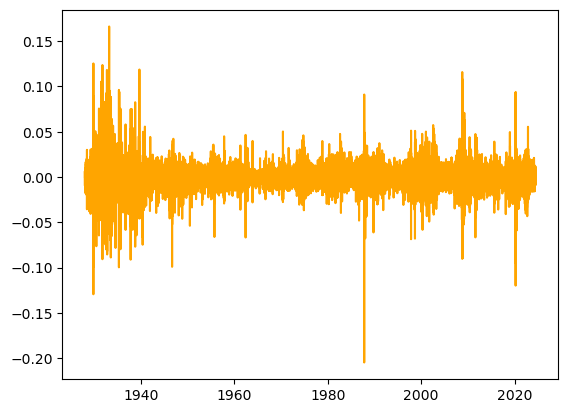

Daily volatility:  1.19%
Monthly volatility:  5.47%
Annual volatility:  18.96%


In [16]:
# Plot the price returns
plt.plot(spx['return'], color = 'orange')
plt.show()

# Calculate daily std of returns
std_daily = spx['return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily*100))

# Convert daily volatility to monthly volatility
std_monthly = np.sqrt(21) * std_daily
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly*100))

# Convert daily volatility to annaul volatility
std_annual = np.sqrt(252) * std_daily
print ('Annual volatility: ', '{:.2f}%'.format(std_annual*100))

### Simulate ARCH and GARCH processes

In [25]:
def simulate_GARCH(n, omega, alpha, beta = 0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

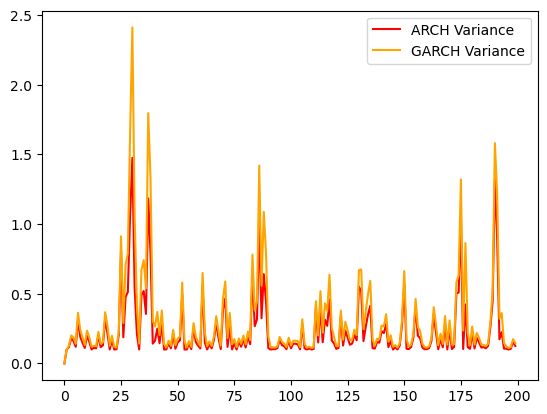

In [27]:
# Simulate a ARCH(1) series
arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = 0.1, alpha = 0.7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = 0.1, alpha = 0.7, 
                                             beta = 0.1)
# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()